In [1]:
%matplotlib inline

import os.path as fs
from PIL import Image
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

try:
    import cPickle as pickle
except:
    import pickle

DATA_DIR = '../data'

WIKI_CROPS_DIR = "wiki_crop"
IMDB_CROPS_DIR = "imdb_crop"

WIKI_META_OBJ = 'wiki_meta.obj'
IMDB_META_OBJ = 'imdb_meta.obj'

In [2]:
lmap = lambda f, l: list(map(f, l))
lfilter = lambda f, l: list(filter(f, l))

def filter_meta_data(data, filter_mask):
    return {
        'path':   data['path'][filter_mask],
        'name':   data['name'][filter_mask],
        'age':    data['age'][filter_mask],
        'gender': data['gender'][filter_mask]
    }

def to_bins(data, bins):
    bin_labels = lmap(lambda b: '%s-%s' % b, bins)
    binarize = lambda x: bins.index(next(filter(lambda e: x >= e[0] and x <= e[1], bins)))
    binarize_vec = np.vectorize(binarize)
    return binarize_vec(data), bin_labels
    
def plot_histo(data, bins=30, range=(0,100), figsize=(10,5), xticks=None, xlabel=None, ylabel=None):
    hist, bin_edges = np.histogram(data, bins=bins, range=range)

    plt.figure(figsize=figsize)
    plt.bar(bin_edges[:-1], hist, width=1)
    plt.xlim(min(bin_edges), max(bin_edges))
    if xticks is not None:
        plt.xticks(np.arange(len(xticks)) + 0.5, xticks)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.show()

## Analyse Wiki Dataset

In [3]:
with open(fs.join(DATA_DIR, WIKI_META_OBJ), 'rb') as file:
    wiki_meta = pickle.load(file)

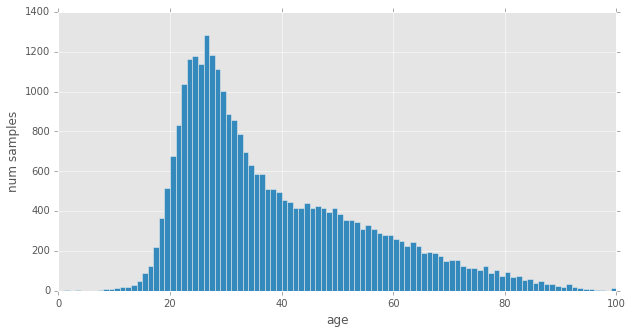

In [11]:
plot_histo(wiki_meta['age'], bins=100, xlabel='age', ylabel='num samples')

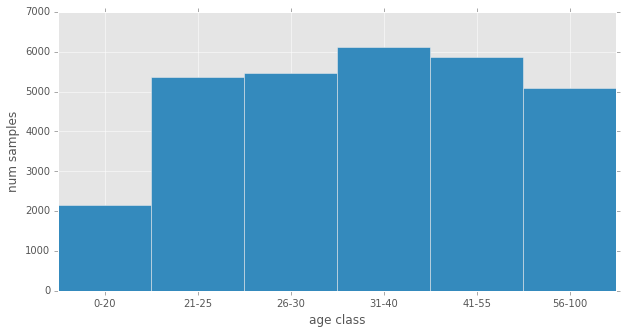

In [10]:
age_classes = [(0,20),(21,25),(26,30),(31,40),(41,55),(56,100)]

age_binned, age_labels = to_bins(wiki_meta['age'], age_classes)

plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels, xlabel='age class', ylabel='num samples')

## Analyse IMDb Dataset

In [6]:
with open(fs.join(DATA_DIR, IMDB_META_OBJ), 'rb') as file:
    imdb_meta = pickle.load(file)

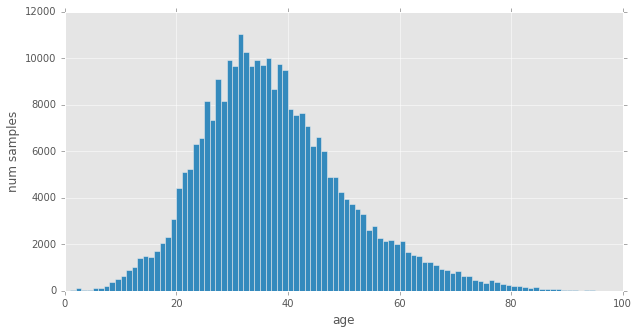

In [12]:
plot_histo(imdb_meta['age'], bins=100, xlabel='age', ylabel='num samples')

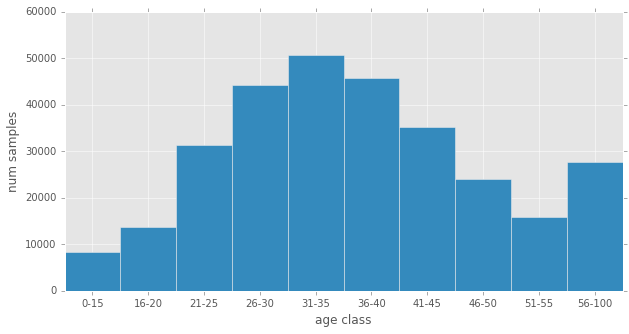

In [13]:
age_classes = [(0,15),(16,20),(21,25),(26,30),(31,35),(36,40),(41,45),(46,50),(51,55),(56,100)]

age_binned, age_labels = to_bins(imdb_meta['age'], age_classes)

plot_histo(age_binned, bins=range(len(age_labels) + 1), xticks=age_labels, xlabel='age class', ylabel='num samples')